In [1]:

import pandas as pd
Red_wine_df = pd.read_csv(r"C:\Users\sandy\Desktop\Project_realected_practice\ML-Algorthim_practice\Wine_quality_model\Red_wine_model\winequality-red.csv", sep=';')
Red_wine_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
Red_wine_df.quality.unique()

array([5, 6, 7, 4, 8, 3])

Checking if there is any null value is there or not and the data type if assigned properly or not 

In [3]:
Red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Before going to the feature selection part if we have limited to select only 5 or 3 feature means we can select that based on the co-relation basis and by this we can understand the dataframe much better

<Axes: >

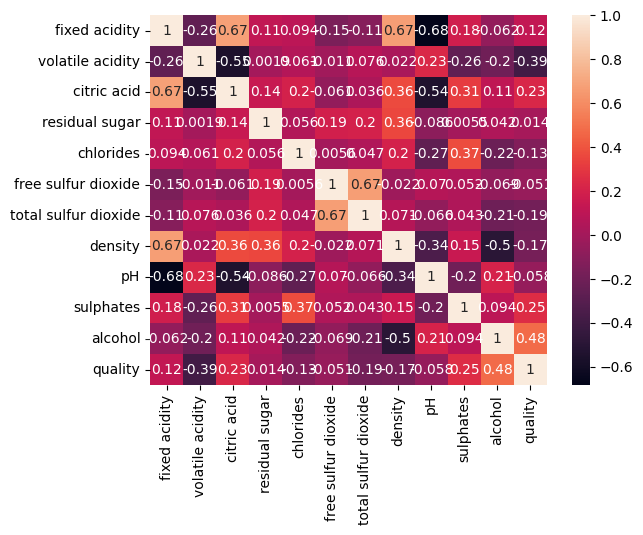

In [4]:
import seaborn as sns
sns.heatmap(Red_wine_df.corr(),annot=True)

In this we can see quality of the wine is depends Positive corelation on volatile acidity>citric acid>total sulfur dioxide>density>chlorides etc.......
Negative corelation - alcohole>sulphate>density>pH

The first step in here is to indentify the feature and target

Features - In this we can use all the column except the quality as a feature 

Target - Quality

In [5]:
# this contains both positive and negative corelations
Feature=Red_wine_df.iloc[:,:-1]
# ths contains only positive corelation
Feature1=Red_wine_df[['volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density']]


In [6]:

Target=Red_wine_df.quality

In [7]:
Target1=Red_wine_df.quality

In [8]:
Target.unique()

array([5, 6, 7, 4, 8, 3])

In [9]:
Red_wine_df.quality.unique()

array([5, 6, 7, 4, 8, 3])

Now I have understand a data better and also decided which columns want to be a feature and which want to be a Target now I need to split the data for testing and training.

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Feature,Target,test_size=0.3,random_state=10)
#----------------------------------------------------------------------------------------------------------------------------------------------------------

# This is for positive corelation
X_train1,X_test1,y_train1,y_test1 = train_test_split(Feature1,Target1,test_size=0.3,random_state=10)

Now I have Splited the Dataframe 30% for testing and 70% for training the model But before training the model i observed that all columns are not have a equal number of digits some columns have values between 1 to 0 some have 1 to 10 some have 1 to 100 so for takle or solve this irregularities I decided to go with scaling or normalization --- StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



#----------------------------------------------------------------------------------------------------------------------------------------------------------
# This is for positive corelation
scaler = StandardScaler()
X_train_scaled1= scaler.fit_transform(X_train1)
X_test_scaled1= scaler.transform(X_test1)



In [12]:
X_train_scaled

array([[ 1.09433477,  0.03234642,  1.03879508, ..., -1.21814075,
        -0.40592454, -1.03331436],
       [ 2.17329282, -0.41659174,  1.09009303, ..., -1.15301727,
        -0.18680753,  0.01526282],
       [ 0.18573851, -1.31446804,  1.2439869 , ..., -0.37153555,
        -0.46070379, -0.84266396],
       ...,
       [-0.77964501, -0.80941262,  1.09009303, ...,  0.54019313,
         0.580102  ,  0.9685148 ],
       [ 0.92397297, -0.97776443,  0.98749712, ..., -0.5017825 ,
        -0.78937931,  1.54046599],
       [-0.77964501,  0.4251673 ,  0.11543186, ..., -0.04591816,
         2.7712721 , -0.17538757]])

Now I am going to train the model 

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled,y_train)

#----------------------------------------------------------------------------------------------------------------------------------------------------------
# This is for positive corelation
model1=LogisticRegression()
model1.fit(X_train_scaled1,y_train1)

LogisticRegression()

Now I am going to test the model

In [14]:
y_pred = model.predict(X_test_scaled)
print(y_pred)
#----------------------------------------------------------------------------------------------------------------------------------------------------------
# This is for positive corelation
y_pred1 = model1.predict(X_test_scaled1)
print(y_pred1)

[6 5 5 6 5 7 6 6 5 5 6 5 5 5 5 4 5 6 5 5 5 6 6 5 5 6 6 6 6 5 5 5 6 6 6 5 7
 5 6 5 6 6 5 7 5 6 5 6 7 5 6 7 6 7 6 6 6 5 5 5 6 5 6 6 5 5 6 6 5 6 6 5 6 5
 5 5 6 6 6 6 6 5 6 5 6 6 6 5 6 5 7 6 7 5 5 6 5 5 6 6 6 5 5 6 6 6 5 6 6 6 5
 6 5 5 5 5 5 5 6 6 5 5 6 5 6 5 5 5 5 5 5 5 5 6 5 7 6 5 5 6 6 6 5 6 5 6 6 5
 5 6 5 6 6 6 5 5 6 5 6 7 6 6 6 6 6 7 7 7 6 6 6 7 6 6 5 5 6 5 5 6 6 6 6 6 5
 5 6 7 5 6 5 5 6 6 5 6 5 6 7 6 6 6 6 5 5 5 6 5 5 7 5 6 6 5 6 5 6 5 5 5 6 7
 5 6 7 5 6 6 5 5 5 6 5 6 5 6 5 3 5 5 5 5 6 7 6 6 5 5 6 6 5 6 5 5 5 5 7 7 6
 6 6 5 6 5 5 6 5 6 6 5 5 6 6 6 5 5 5 5 6 5 6 6 6 6 6 5 6 6 5 6 6 5 7 6 5 6
 5 6 5 6 6 6 6 6 6 7 5 7 6 5 6 5 6 5 6 7 6 7 5 5 6 6 6 7 6 6 6 5 5 5 6 7 6
 6 5 5 5 5 5 5 6 5 6 6 5 5 6 5 5 6 5 5 7 5 5 5 6 6 6 5 5 6 6 6 6 5 6 6 6 6
 6 5 6 6 6 7 6 5 5 6 6 5 6 5 5 6 5 6 6 6 6 6 7 6 5 5 5 6 5 6 5 6 5 5 5 5 7
 6 6 6 6 5 5 5 5 6 5 6 7 7 5 5 6 5 5 6 5 6 5 6 6 5 6 6 5 7 6 6 6 5 5 6 5 5
 6 5 5 6 5 5 7 5 6 5 5 6 5 6 6 5 6 5 6 7 7 6 6 6 7 5 5 5 5 6 5 5 5 5 5 5]
[6 5 6 6 6 7 6 6 5 5 6 5 5

Now I am checking how well my model is perfoming and models accuracy

In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
pd.crosstab(y_test,y_pred)

0.5645833333333333


col_0,3,4,5,6,7
quality,,,,,
3,0,0,1,1,0
4,0,0,11,5,0
5,1,1,144,64,0
6,0,0,57,109,17
7,0,0,2,38,18
8,0,0,0,6,5


In [19]:
y_test.count()

quality
5    210
6    183
7     58
4     16
8     11
3      2
Name: count, dtype: int64

In [17]:
#----------------------------------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test1,y_pred1))
pd.crosstab(y_test1,y_pred1)

0.5270833333333333


col_0,3,4,5,6,7,8
quality,,,,,,
3,0,0,1,1,0,0
4,0,0,11,5,0,0
5,1,1,127,78,3,0
6,0,0,58,115,9,1
7,0,0,6,41,11,0
8,0,0,0,8,3,0


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        16
           5       0.63      0.60      0.62       210
           6       0.46      0.63      0.53       183
           7       0.42      0.19      0.26        58
           8       0.00      0.00      0.00        11

    accuracy                           0.53       480
   macro avg       0.25      0.24      0.24       480
weighted avg       0.50      0.53      0.50       480



The accuracy of this model is 56.4% for considering all features is not so good either there may be a problem in data or I need to optimize the model to perform better

The accuracy of this model is 52.7% for considering only positive corelation features only is not so good either there may be a problem in data or I need to optimize the model to perform better


Till now I only know linear regression and logistic regression while research the Random Forest ML model performs better in this condions so I conclude that this model is only giving 50% accuracy It is not a good accuracy score to use it for a prediction purpose

Now I have learned a undersampling and oversampling technique and also learned about the KNN -K-nearest-neighbour lets try that and observe what is the accuracy score

In [20]:
y_test.value_counts()

quality
5    210
6    183
7     58
4     16
8     11
3      2
Name: count, dtype: int64

Since the data is to low in 4,8,2 the undersampling will make the drop which led to the minimal amount and when the data is not sufficient the is no use in using ML even oversampling may led to some issues any way I go with the undersampling and after got the prediction score I will do a oversample and compare the two model's accuracy

(42, 11)
(42,)


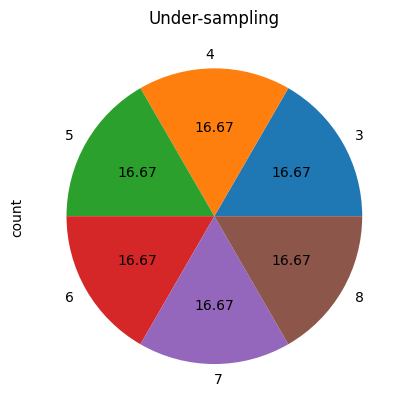

In [22]:

from imblearn.under_sampling import RandomUnderSampler


rus = RandomUnderSampler() # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled , y_train)

print(X_train_rus.shape)
print(y_train_rus.shape)
ax = y_train_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")


In [23]:
y_train_rus.value_counts()

quality
3    7
4    7
5    7
6    7
7    7
8    7
Name: count, dtype: int64

The training data is too low 

Training the model with new undersampled values using LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_rus, y_train_rus)

LogisticRegression()

In [26]:
y_pred = model.predict(X_test_scaled)
print(y_pred)

[6 5 7 4 6 8 8 5 5 6 8 3 4 3 5 3 5 6 6 3 3 7 5 4 4 6 7 6 8 4 5 5 8 7 8 4 8
 6 8 4 4 8 5 7 5 8 7 6 8 6 6 7 7 8 6 8 4 3 4 5 8 6 7 7 5 4 6 6 6 7 4 4 4 6
 5 4 5 6 6 8 8 6 8 6 7 4 4 4 4 6 7 7 8 4 5 3 4 3 7 8 7 4 5 4 8 4 5 6 8 6 6
 7 5 4 5 6 5 6 7 8 5 6 6 5 5 3 4 4 5 3 3 5 8 4 5 8 4 6 5 7 6 6 4 5 6 5 6 5
 5 6 4 7 7 7 7 5 7 4 5 8 7 7 8 8 7 5 7 8 8 6 4 7 7 7 4 4 4 6 5 7 6 6 5 6 4
 4 4 7 5 4 5 6 7 8 6 5 4 7 8 6 7 7 7 5 6 3 6 4 6 7 4 6 4 5 4 4 5 4 3 5 5 7
 5 6 8 4 6 5 6 6 3 6 3 6 6 6 5 3 5 4 3 4 4 7 8 7 3 4 6 8 4 6 4 6 3 5 8 7 7
 8 6 6 7 6 4 7 5 7 5 6 5 8 8 7 5 6 5 5 7 4 7 8 6 7 6 3 8 7 6 7 8 5 8 5 4 7
 5 6 5 6 7 7 6 8 7 7 4 8 8 3 5 5 6 6 8 8 7 8 6 4 5 8 6 7 4 7 8 6 5 4 6 8 4
 7 3 4 5 6 3 5 6 4 4 7 5 4 7 5 5 7 4 4 8 3 5 4 8 6 6 5 3 7 7 4 5 5 8 6 4 8
 4 6 8 6 7 8 5 5 5 8 6 5 4 6 5 6 3 6 8 5 6 6 7 7 4 5 5 8 6 7 6 7 3 5 4 5 7
 4 8 7 5 5 6 5 4 6 4 4 7 7 5 5 8 5 5 3 4 4 4 7 5 5 6 7 3 8 7 6 7 5 5 4 4 4
 6 5 6 4 4 6 7 4 8 4 4 7 6 6 7 5 6 4 5 7 8 6 4 4 8 5 5 3 4 8 4 4 6 6 6 5]


In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
pd.crosstab(y_test,y_pred)

0.2875


col_0,3,4,5,6,7,8
quality,,,,,,
3,1,0,0,1,0,0
4,8,4,1,3,0,0
5,12,64,63,47,14,10
6,9,23,32,46,43,30
7,0,5,3,7,20,23
8,0,0,0,0,7,4


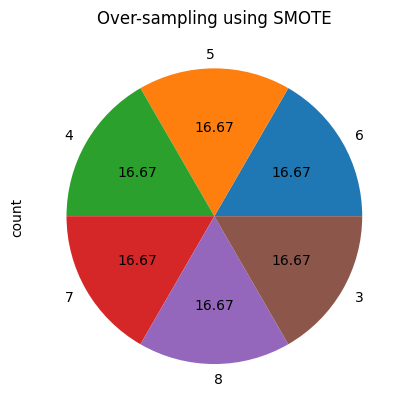

In [28]:
from imblearn.over_sampling import SMOTE


smote = SMOTE()  # Create an instance of SMOTE


X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)  # Apply SMOTE


# You can check the class distribution after applying SMOTE
ax = y_train_smote.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling using SMOTE")

In [29]:
y_train_smote.value_counts()

quality
6    471
5    471
4    471
7    471
8    471
3    471
Name: count, dtype: int64

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [34]:
y_pred = model.predict(X_test_scaled)
print(y_pred)

[6 5 8 6 5 7 7 6 5 5 7 3 4 3 5 4 6 6 5 3 3 6 6 4 4 6 7 6 8 4 5 5 4 7 8 3 8
 5 6 5 6 6 5 7 5 7 6 6 8 6 6 7 7 8 6 7 6 5 4 5 4 5 7 6 4 5 6 6 5 7 4 5 6 5
 5 4 8 6 6 8 7 5 8 5 6 6 4 3 6 5 7 7 8 4 5 4 4 3 6 7 7 4 5 4 4 6 5 6 7 6 5
 7 5 5 4 5 5 5 7 8 5 5 6 5 6 4 5 5 5 3 3 5 8 6 5 8 7 5 5 7 6 6 5 6 6 6 6 5
 5 6 5 7 7 7 6 5 6 4 7 7 7 7 8 8 6 7 7 7 6 6 6 7 6 7 5 5 4 5 5 7 6 6 6 6 4
 5 6 7 5 6 5 5 7 8 5 4 4 6 7 6 7 6 7 5 5 4 6 5 5 7 4 6 4 5 4 6 6 5 4 5 6 7
 5 6 7 5 6 6 5 5 3 6 3 6 5 6 5 3 5 5 5 5 4 7 8 7 4 5 6 6 5 4 5 5 3 5 8 7 7
 7 6 5 7 5 4 6 5 7 6 5 5 8 4 6 4 5 4 5 6 5 8 8 6 7 6 3 7 6 5 7 7 5 8 6 3 7
 3 6 5 6 7 8 6 7 6 7 5 7 8 3 6 5 6 4 4 7 7 8 5 3 6 8 6 7 4 7 8 5 5 5 6 8 6
 7 4 5 5 5 3 5 6 5 6 7 5 4 7 5 5 7 5 4 7 3 5 4 7 6 6 5 3 7 7 4 8 5 4 6 6 7
 6 5 8 6 7 8 6 4 5 7 4 5 4 5 4 6 3 6 6 6 6 6 7 7 5 5 5 7 5 6 5 8 4 5 5 5 7
 6 7 7 6 5 5 5 4 6 5 4 7 7 6 3 8 5 4 4 4 6 5 7 6 3 6 6 4 7 7 6 7 5 5 6 5 6
 6 4 5 6 5 5 7 5 8 4 5 7 5 6 7 5 6 5 6 7 8 6 4 6 8 5 5 4 5 7 5 5 5 5 5 4]


In [35]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
pd.crosstab(y_test,y_pred)

0.4479166666666667


col_0,3,4,5,6,7,8
quality,,,,,,
3,1,0,0,1,0,0
4,6,3,4,3,0,0
5,11,36,107,37,11,8
6,6,20,32,69,42,14
7,0,3,1,13,31,10
8,0,0,0,0,7,4


The accuracy score for under and oversampling is different and since oversampling is not preferable I have not conclude anything and I decided to go with KNN algorithm to check how will it performs using undersampling.

In [45]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
#Train Model and Predict
KNN_Model = KNeighborsClassifier(n_neighbors = k).fit(X_train_rus, y_train_rus)
KNN_Model


KNeighborsClassifier()

In [46]:
Knn_y_pred = KNN_Model.predict(X_test_scaled)
print(Knn_y_pred)

[7 5 7 3 4 8 8 7 8 4 8 4 3 3 5 3 5 4 4 4 3 4 5 4 4 3 8 3 7 4 4 5 4 7 7 3 8
 4 8 5 4 4 5 7 4 8 7 3 7 4 7 7 6 8 5 8 4 4 5 5 4 4 7 7 5 5 5 5 4 7 4 5 5 7
 5 5 7 4 3 8 7 4 4 4 7 4 5 6 4 4 7 7 4 6 5 3 4 3 7 7 7 5 4 4 4 5 5 4 8 3 7
 7 8 5 4 4 4 4 6 7 3 4 4 4 5 3 5 5 4 3 4 4 3 4 4 7 4 4 4 7 7 6 4 5 5 5 7 4
 5 7 5 7 7 7 7 4 7 5 4 4 7 7 8 8 7 5 7 7 6 4 6 7 4 6 4 3 3 4 4 7 8 3 3 6 5
 3 3 8 4 5 5 8 7 7 8 4 6 7 8 3 7 7 7 4 4 3 5 4 4 7 4 8 4 4 4 5 4 4 4 4 7 7
 3 4 8 3 4 6 4 5 3 7 3 7 4 5 4 3 5 6 4 6 4 7 7 7 4 4 7 7 3 3 5 4 3 4 7 7 8
 7 7 4 7 7 3 4 5 7 3 7 4 4 4 7 4 4 4 5 7 6 7 8 6 7 7 4 8 7 4 7 4 5 7 5 3 7
 3 6 5 6 6 7 4 8 6 7 4 8 8 3 5 3 6 3 6 4 7 7 5 6 6 7 6 7 4 4 7 4 5 5 7 8 4
 7 4 5 5 5 3 4 7 6 3 7 5 4 7 4 5 7 5 3 7 3 4 3 7 6 5 4 3 7 7 4 7 4 4 4 5 7
 4 4 6 3 7 7 7 5 4 7 3 5 4 4 7 4 3 3 4 5 5 3 7 7 4 5 5 7 4 7 4 7 4 4 5 4 4
 4 8 7 5 4 4 5 3 4 4 4 7 7 5 3 7 5 5 3 5 4 8 7 3 8 6 8 4 8 7 5 7 5 5 4 5 5
 7 7 4 3 5 4 7 4 8 5 5 7 4 4 7 3 5 3 7 7 7 4 4 8 8 5 4 4 5 4 4 4 4 4 6 5]


In [47]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,Knn_y_pred))
pd.crosstab(y_test,y_pred)

0.23333333333333334


col_0,3,4,5,6,7,8
quality,,,,,,
3,1,0,0,1,0,0
4,6,3,4,3,0,0
5,11,36,107,37,11,8
6,6,20,32,69,42,14
7,0,3,1,13,31,10
8,0,0,0,0,7,4


Actually this model also gave not gave a good accuracy score and I this I have not made a mistake if anyone found any mistake means kindly correct me since I was practicing it there is a possibility of making mistakes. So the conclusion is Logistic and KNN algorithms not giveing a better accuracy in this.
In this the accuracy score is very less and when I do a undersampling the most of the data is cuttoff so with this limited we can't able to decide the models accuracy Conclusion is we need to modify the data or collect more data in some category to make our model perform well